Importing Necessary Libraries

In [216]:
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras_preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import re

pd.set_option('display.max_colwidth', None)

Loading Data and Exploration

In [217]:
df = pd.read_csv('/home/coochie/vscode/DeepLearing/data/text_data/bbc/bbc-text.csv')

In [218]:
df.shape

(2225, 2)

In [219]:
df.head()

category  \
0           tech   
1       business   
2          sport   
3          sport   
4  entertainment   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [220]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leader charles kennedy has said voters now have a fundamental lack of trust of tony blair as prime minister. he said backing his party was not a wasted vote adding that with the lib dems what you see is what you get . he made his comments at the start of a day of appearances on channel five in a session on the wright stuff programme. questions from callers a studio audience and the show s presenter covered lib dem tax plans anti-terror laws and immigration. mr kennedy said during his nearly 22 years in parliament he had seen prime ministers and party leaders come and go and knew the pitfalls of british politics. 1983 was when i was first elected as an mp - so tony blair michael howard and myself were all class of 83 - and over that nearly quarter of a century the world has changed out of recognition he said. we don t actually hear the argument any longer: lib dems good people reasonable ideas but only if we thought they could win around here - it s a wasted vote . you don t hear that because the evidence of people s senses demonstrates that it isn t a wasted vote. but he said mr blair had lost the trust of the british people. there is a fundamental lack of trust in tony blair as prime minister and in his government he said. what we ve got to do as a party - what i ve got to do as a leader of this party - is to convey to people that what you see is what you get. mr kennedy also used his tv appearance to defend his party s plans to increase income tax to 50% for those earning more than £100 000 saying it would apply to just 1% of the population. he said the extra revenue would allow his party to get rid of tuition and top-up fees introduce free personal care for the elderly and replace the council tax with a local income tax. mr blair has already spent a day with five and michael howard is booked for a similar session.
freq,511,2


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [222]:
df['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [223]:
length = df['text'].apply(len)

print(length.max())

25483


<Axes: xlabel='category', ylabel='count'>

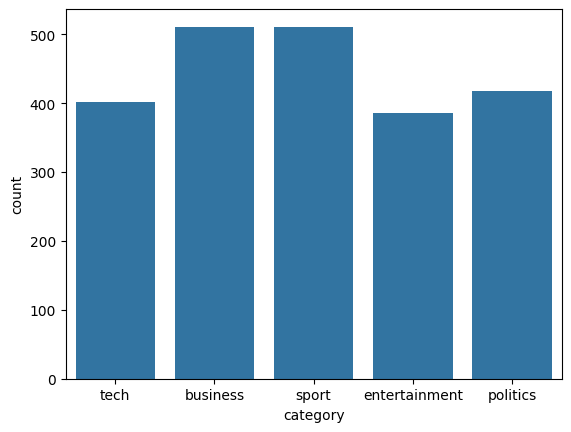

In [224]:
sns.countplot(x='category',data=df)

Cleaning the Data

In [225]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/coochie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text


In [227]:
df['text']=df['text'].apply(clean_text)

In [228]:
text = df['text']
category = df['category']
print("Text: " ,text[1],"\n", "category: ", category[1])

Text:  worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing 11bn 58bn fraud never made accounting decisions witness told jurors david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems phone company collapsed 2002 prosecutors claim losses hidden protect firm shares mr myers already pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross eamination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom books mr weingarten pressed replied witness mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards mr ebbers team meanwhile looking portray affable boss admission pe graduate economist what

In [229]:
one_hot_encoded_df = pd.get_dummies(df['category'],columns=df["category"])
one_hot_encoded_df = pd.concat([df, one_hot_encoded_df], axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop(columns='category')
boolean_columns = list(df['category'].unique())
one_hot_encoded_df[boolean_columns] = one_hot_encoded_df[boolean_columns].astype(int)
one_hot_encoded_df

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different five years time according epert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also builtin highdefinition tv sets big business japan us slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels although us leads technology moment also concern raised europe particularly growing uptake services like sky+ happens today see nine months years time uk adam hume bbc broadcast futurologist told bbc news website likes bbc issues lost advertising revenue yet pressing issue moment commercial uk broadcasters brand loyalty important everyone talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest reality broadband connections anybody producer content added challenge hard promote programme much choice means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers means networks us terms channels could take leaf google book search engine future instead scheduler help people find want watch kind channel model might work younger ipod generation used taking control gadgets play might suit everyone panel recognised older generations comfortable familiar schedules channel brands know getting perhaps want much choice put hands mr hanlon suggested end kids diapers pushing buttons already everything possible available said mr hanlon ultimately consumer tell market want 50 000 new gadgets technologies showcased ces many enhancing tvwatching eperience highdefinition tv sets everywhere many new models lcd liquid crystal display tvs launched dvr capability built instead eternal boes one eample launched show huma 26inch lcd tv 80hour tivo dvr dvd recorder one us biggest satellite tv companies directtv even launched branded dvr show 100hours recording capability instant replay search function set pause rewind tv 90 hours microsoft chief bill gates announced preshow keynote speech partnership tivo called tivotogo means people play recorded programmes windows pcs mobile devices reflect increasing trend freeing multimedia people watch want want,0,0,0,0,1
1,worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing 11bn 58bn fraud never made accounting decisions witness told jurors david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems phone company collapsed 2002 prosecutors claim losses hidden protect firm shares mr myers already pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross eamination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom books mr weingarten pressed replied witness mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards mr ebbers team meanwhile looking portray affable boss admission pe graduate economist whatever abilities mr ebbers transformed worl

In [230]:
judul = one_hot_encoded_df['text'].values
label = one_hot_encoded_df[df['category'].unique()].values

In [231]:
judul_latih, judul_test, label_latih, label_test = train_test_split(judul, label, test_size=0.2)

In [232]:
print(judul_latih,"\n",len(judul_latih))

['sony psp console hits us march us gamers able buy sony playstation portable 24 march news europe debut handheld console go sale 250 132 first million sold come spiderman 2 umd disc format machine sony billed machine walkman 21st century sold 800 000 units japan console 12cm 74cm play games movies music also offers support wireless gaming sony entering market dominated nintendo many years launched ds handheld japan us last year sold 28 million units sony said wanted launch psp europe roughly time us gamers fear launch put back nintendo said release ds europe 11 march gaming core gaming device entertainment device said kaz hirai president sony computer entertainment america'
 'mci shares climb takeover bid shares us phone company mci risen speculation takeover talks wall street journal reported thursday qwest bid 63bn 34bn mci firms also epressed interest mci secondlargest us longdistance phone firm may table rival bids analysts said shares mci changed name worldcom emerged bankruptcy 

In [233]:
print(judul_test,"\n",len(judul_test))

['humanoid robot learns run carmaker honda humanoid robot asimo got faster smarter japanese firm leader developing twolegged robots new improved asimo advanced step innovative mobility run find way around obstacles well interact people eventually asimo could find gainful employment homes offices aim develop robot help people daily lives said honda spokesman get robot running first time easy process involved asimo making accurate leap absorbing impact landing without slipping spinning run capable perhaps quite olympic star kelly holmes standard 3km h closer leisurely jog makers claim almost four times fast sony qrio became first robot run last year criteria running robots defined engineers feet ground strides asimo improved ways increasing walking speed 16km h 25km growing 10cm 130cm putting 2kg weight may quite ready yoga freedom movement able twist hips bend wrists thumbs neck asimo already made mark international robot scene november inducted robot hall fame wowed audiences around wo

Tokenization

In [234]:
tokenizer = Tokenizer(num_words=50000, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True)
tokenizer.fit_on_texts(judul_latih) 
tokenizer.fit_on_texts(judul_test)
 
sekuens_latih = tokenizer.texts_to_sequences(judul_latih)
sekuens_test = tokenizer.texts_to_sequences(judul_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


Model

In [284]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000,128,input_length=3000),
    tf.keras.layers.SpatialDropout1D(0.4),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.LSTM(200, dropout=0.2, recurrent_dropout=0.2),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64, kernel_initializer='lecun_normal' ,activation='selu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(32, kernel_initializer='lecun_normal' ,activation='selu'),
    #tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.Dense(50, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(len(boolean_columns), activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])


/home/coochie/vscode/DeepLearing/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [285]:
stop=0.95
class interupsi(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > stop):
      print("\n %2.3f%% accuracy, Great."%(stop*100))
      self.model.stop_training = True

In [286]:
callbacks = interupsi()

In [287]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_6             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [288]:
num_epochs = 10
history = model.fit(
              padded_latih,
              label_latih,
              #steps_per_epoch=20,
              batch_size=64,
              epochs=num_epochs, 
              validation_data=(padded_test, label_test),
              #validation_steps=5,
              callbacks=[callbacks],
              #callbacks=[EarlyStopping(monitor='val_loss',
              #                         patience=3,
              #                         min_delta=0.0001)],
              verbose=1)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.2672 - loss: 1.5931 - val_accuracy: 0.5303 - val_loss: 1.4897
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5838 - loss: 1.2243 - val_accuracy: 0.6337 - val_loss: 0.8082
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.7006 - loss: 0.8127 - val_accuracy: 0.7461 - val_loss: 0.8014
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.8716 - loss: 0.4461 - val_accuracy: 0.7910 - val_loss: 0.5574
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9442 - loss: 0.2469
 95.000% accuracy, Great.
28/28 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9444 - loss: 0.2457 - val_accuracy: 0.8831 - val_loss: 0.3524


Evaluating Model

In [289]:
accr = model.evaluate(padded_test,label_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8782 - loss: 0.3538
Test set
  Loss: 0.352
  Accuracy: 0.883


Plotting Loss & Accuracy

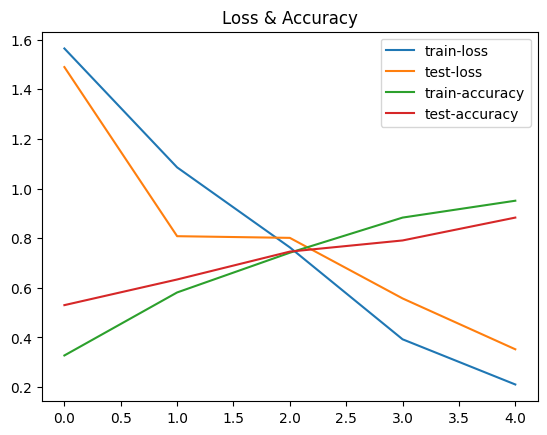

In [290]:
plt.title('Loss & Accuracy')
plt.plot(history.history['loss'], label='train-loss')
plt.plot(history.history['val_loss'], label='test-loss')
plt.plot(history.history['accuracy'], label='train-accuracy')
plt.plot(history.history['val_accuracy'], label='test-accuracy')
plt.legend()
plt.show();

Predictions

In [294]:
new_complaint = ['''Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for 
                 the safety of players amid the COVID-19 pandemic.''']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.00483742 0.0160949  0.8241617  0.12563732 0.02926858]] sport


In [295]:
new_complaint = ['Flipkart revealed the different items that Indians are looking for on the e-commerce site, as relaxing lockdown restrictions allow shopping to start again. Self-care and items to help work from home top the list, according to the e-commerce giant. ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.28876084 0.1940288  0.04855371 0.38980922 0.07884745]] entertainment


In [296]:
new_complaint =['Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.38346168 0.19622444 0.02235562 0.3569171  0.04104112]] tech


In [297]:
new_complaint = ['Having undergone a surgery for shoulder dislocation last month, young Australian pacer Jhye Richardson is hopeful of recovering from the recurring injury by the time cricketing action resumes. Cricket Australias chief medical officer Alex Kountouris sounded optimistic of the fast bowlers recovery process with respect to a comeback later this year.Its a lengthy surgery but it does give him an opportunity now that were not going to play until ... September, October, November or December ... hes obviously a chance with that, Kountouris told News Corp in an interaction.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.00193926 0.00764633 0.9754858  0.01014381 0.00478476]] sport


In [298]:
new_complaint = ['Samsung is making cutting edge chips by using artificial intelligence. The South Korean company has partnered with Synopsys, a leading chip design software firm, to create the new AI-powered features in their latest line of computer processor designs']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[9.1072345e-01 7.5073719e-02 8.9861086e-04 5.2083475e-03 8.0959396e-03]] tech


In [299]:
new_complaint = ['In 2008, the world experienced one of the most severe financial crises in history, commonly referred to as the "2008 financial crisis" or the "Great Recession." The crisis originated in the United States housing market, particularly in the subprime mortgage sector, and quickly spread to become a global economic downturn.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq)
pred = model.predict(padded)
print(pred, boolean_columns[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.02319732 0.96829087 0.00148231 0.00510473 0.00192477]] business
